In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("housing_price_dataset.csv")
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
df.shape

(50000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.0,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.0,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.0,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000
Price,50000.0,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


In [6]:
df["Neighborhood"].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

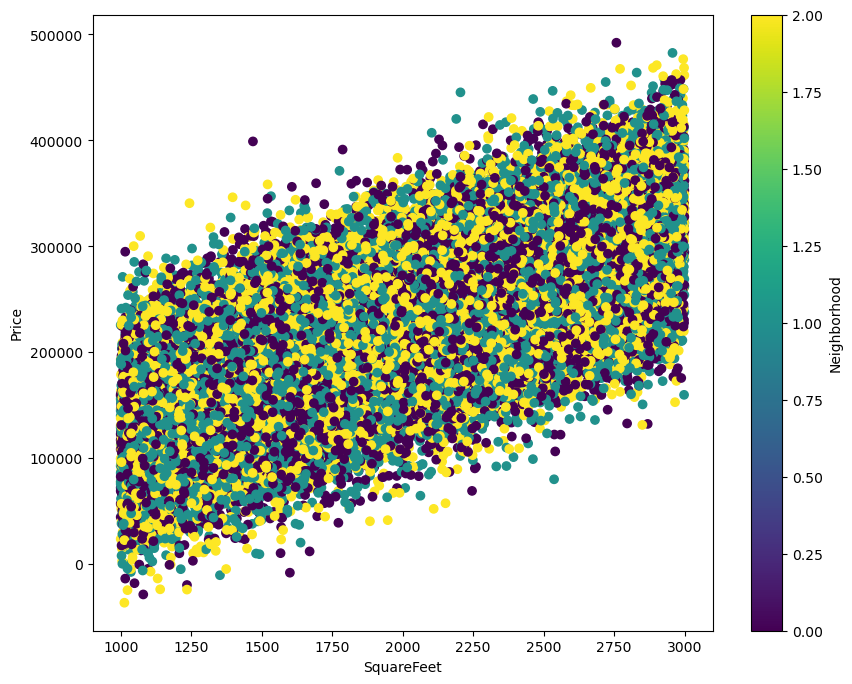

In [7]:
plt.figure(figsize=(10, 8))
df["Neighborhood"] = df["Neighborhood"].astype("category")
plt.scatter(x = df["SquareFeet"], y =df["Price"], c =df["Neighborhood"].cat.codes, cmap = 'viridis')
plt.xlabel("SquareFeet")
plt.ylabel("Price")
plt.colorbar(label = "Neighborhood")
plt.show()

In [8]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [9]:
df["Neighborhood"].value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [10]:
encoder = LabelEncoder()
df["Neighborhood"] = encoder.fit_transform(df["Neighborhood"])
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


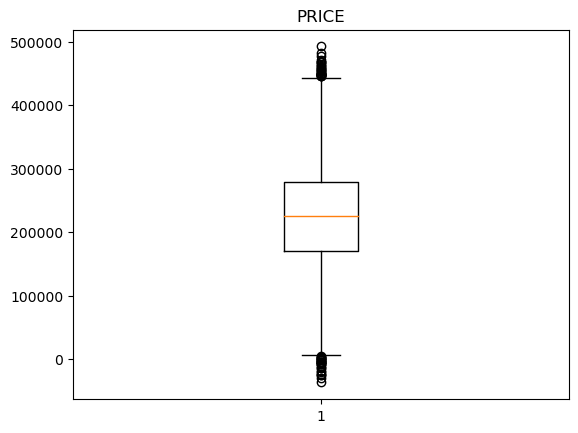

In [11]:
plt.boxplot(df["Price"])
plt.title("PRICE")
plt.show()

In [12]:
df.drop(df[df.Price <= 0].index, axis = 0, inplace = True)

<Axes: >

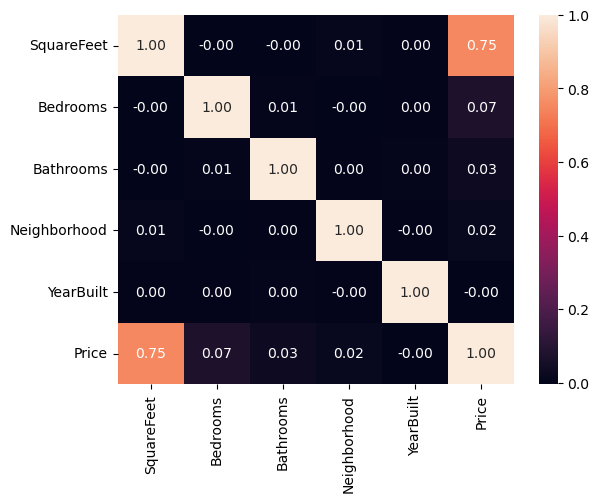

In [13]:
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f")

In [14]:
X = df.drop(columns = ["Price", "Neighborhood", "YearBuilt"], axis = 1)
y = df["Price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
models = {
    "Linear Regression ": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Support Vector Regressor": SVR(),
    "Decession Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "XG Boost Regressor": xb.XGBRegressor(),
    "K Neighbors Regressor": KNeighborsRegressor()
}

In [17]:
def evaluate_model(X_train, X_test, y_train, y_test, models):
    
    report = {}
    
    for i in range(len(models)):
        
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2score = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        report[list(models.keys())[i]] = {
            "R2 SCORE": r2score,
            "MEAN SQUARED ERROR": mse,
            "MEAN ABSOLUTE ERROR": mae
        }
        
    return report

In [ ]:
model_matrics = evaluate_model(X_train, X_test, y_train, y_test, models)
for model, metrics in model_matrics.items():
    print(f"{model} Metrics:")
    print(f"  Accuracy: {metrics['R2 SCORE']}")
    print(f"  Mean Squared Error: {metrics['MEAN SQUARED ERROR']}")
    print(f"  Mean Absolute Error: {metrics['MEAN ABSOLUTE ERROR']}")
    print("\n" + "=" * 30 + "\n")

In [ ]:
max_accuracy_model = max(model_matrics, key=lambda k: model_matrics[k]['R2 SCORE'])
max_accuracy_value = model_matrics[max_accuracy_model]['R2 SCORE']

print(f"The model with the highest accuracy is '{max_accuracy_model}' with an accuracy of {max_accuracy_value}.")